In [5]:
import os
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams.update({'font.family':'Arial','font.size':18})

In [2]:
def read_data(patient_id):
    file = patient_id
    df_meta1 = pd.read_csv("./metadata/"+file+"_metadata.csv",index_col=0)
    df_meta2 = pd.read_csv(file+"_metadata.txt",sep="\t",index_col=0)
    df_umap = pd.read_csv(file+"_UMAP_coords.txt",sep="\t",index_col=0)
    
    print(df_meta1["Classification"].unique())
    
    z_array = ['DCIS']
    for i in df_meta1["Classification"].unique():
        if 'Invasive cancer' in str(i):
            z_array.append(i)
    df = pd.concat([df_meta1,df_meta2,df_umap],axis=1)
    df_relevant = df[df["Classification"].isin(z_array)]
    
    return df_relevant

In [3]:
d_all_patient_data = {}
for patient in ["CID4535", "CID4290", "CID44971", "CID4465", "1142243F", "1160920F"]:
    d_all_patient_data[patient] = read_data(patient)

['Invasive cancer + lymphocytes'
 'Invasive cancer + adipose tissue + lymphocytes' 'Stroma'
 'Invasive cancer' 'Uncertain' 'Lymphocytes' 'Artefact' nan
 'Adipose tissue']
['Stroma' 'Invasive cancer + stroma + lymphocytes'
 'Invasive cancer + stroma' nan 'Artefact']
['Normal + stroma + lymphocytes' nan 'Stroma + adipose tissue' 'Stroma'
 'DCIS' 'Artefact' 'Lymphocytes' 'Invasive cancer + lymphocytes']
['Invasive cancer + stroma + lymphocytes' 'Stroma' 'Artefact'
 'Normal duct']
['Artefact' 'Invasive cancer + stroma + lymphocytes' 'Necrosis' 'Stroma'
 'Lymphocytes' 'TLS']
['Adipose tissue' 'Stroma' 'Normal glands + lymphocytes' 'Lymphocytes'
 'Cancer trapped in lymphocyte aggregation'
 'Invasive cancer + stroma + lymphocytes' 'Artefact' nan 'DCIS']


(-0.7185747940605524, 0.0)


c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

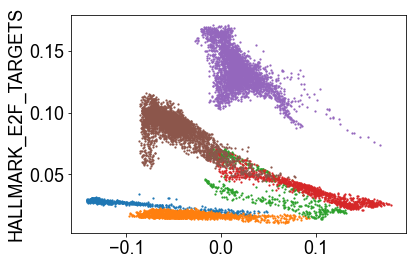

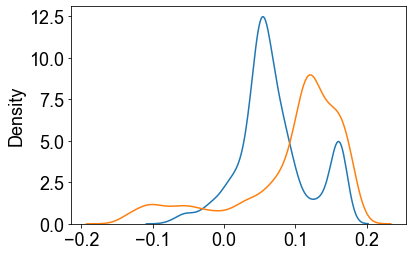

In [109]:
cumulative_array = []
cat_ER = []
cat_TNBC = []
for patient in ["CID4535", "CID4290", "CID44971", "CID4465", "1142243F", "1160920F"]:
    df_temp = d_all_patient_data[patient]
    x = df_temp["Mesenchymal_tumour_signature"] - df_temp["Epithelial_tumour_signature"] #Epithelial_tumour_signature
    y = df_temp["HALLMARK_E2F_TARGETS"] #Mesenchymal_tumour_signature
    z = df_temp["pEMT"]
    cumulative_array = cumulative_array + list(y-x)
    if patient in ["CID4535", "CID4290"]:
        cat_ER += list(y-x)
    else:
        cat_TNBC += list(y-x)
    sns.scatterplot(x,y,linewidth=0,legend=False,s=5)
print(ss.pearsonr(x,y))
#plt.savefig("plots_epi_mes_all_patients.png",dpi=800)
plt.show()
plt.close()
#sns.kdeplot(cumulative_array)
sns.kdeplot(cat_ER)
sns.kdeplot(cat_TNBC)
plt.show()

(-0.9420789959052508, 0.0)
(-0.4008645444744696, 2.075190806158116e-89)


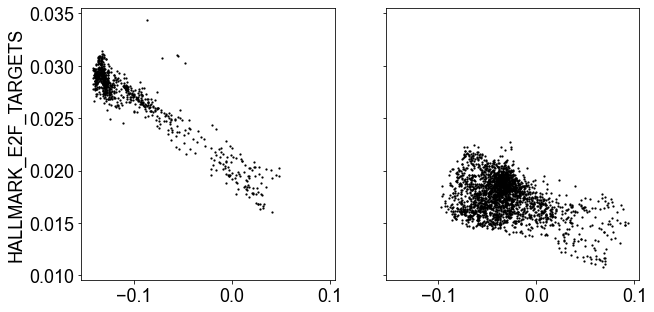

In [138]:
fig, axes = plt.subplots(1, 2,sharey=True,sharex=True, figsize=(10,5))
c = 0
for patient in ["CID4535", "CID4290", "CID44971", "CID4465", "1142243F", "1160920F"]:
    if patient not in ["CID4535", "CID4290"]:
        continue
    df_temp = d_all_patient_data[patient]
    x = df_temp["Mesenchymal_tumour_signature"] - df_temp["Epithelial_tumour_signature"]#Epithelial_tumour_signature
    x = df_temp[""]
    y =  df_temp["HALLMARK_E2F_TARGETS"] #Mesenchymal_tumour_signature
    z = df_temp["pEMT"]    
    print(ss.pearsonr(x,y))
    sns.scatterplot(ax=axes[c],x=x,y=y,linewidth=0,legend=False,s=5,color='black')
    c += 1
axes[1].set_ylabel("")

#plt.savefig("plots_ER_emt_e2f.png",dpi=800)
plt.show()

(0.9381777264418949, 0.0)
(0.2804466897521861, 8.882829355222948e-43)


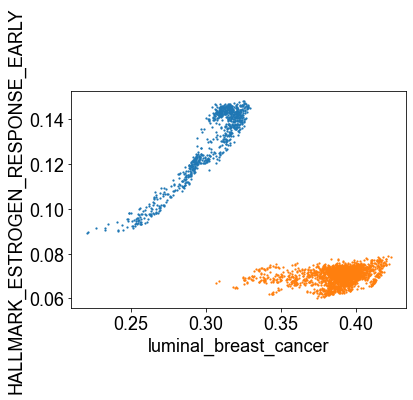

In [6]:
c = 0
for patient in ["CID4535", "CID4290", "CID44971", "CID4465", "1142243F", "1160920F"]:
    if patient not in ["CID4535", "CID4290"]:
        continue
    df_temp = d_all_patient_data[patient]
    x = df_temp["luminal_breast_cancer"] #Epithelial_tumour_signature
    y = df_temp["HALLMARK_ESTROGEN_RESPONSE_EARLY"] #Mesenchymal_tumour_signature
    z = df_temp["pEMT"]    
    print(ss.pearsonr(x,y))
    sns.scatterplot(x=x,y=y,linewidth=0,legend=False,s=5)
    c += 1
#plt.savefig("plots_ER_lum_mes.png",dpi=800)
plt.show()

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


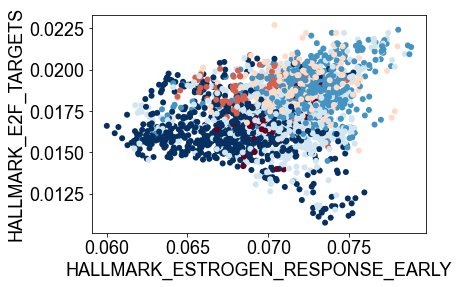

In [26]:
df_temp = d_all_patient_data["CID4290"]
sns.scatterplot(df_temp["HALLMARK_ESTROGEN_RESPONSE_EARLY"],df_temp["HALLMARK_E2F_TARGETS"],linewidth=0,hue=df_temp["seurat_clusters"],palette='RdBu_r')
plt.legend([],frameon=False)

In [17]:
for i in df_temp:
    if "HALLMARK" in i:
        if ss.spearmanr(df_temp["UMAP_1"], df_temp[i])[0] > 0.4:
            print(i)

HALLMARK_CHOLESTEROL_HOMEOSTASIS
HALLMARK_ESTROGEN_RESPONSE_EARLY
HALLMARK_ESTROGEN_RESPONSE_LATE
HALLMARK_PI3K_AKT_MTOR_SIGNALING
HALLMARK_P53_PATHWAY
